In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
file_path_2024 = '../data/2024_parliamentary_round_1_proportional.csv'
file_path_2020 = '../data/2020_parliamentary_round_1_proportional.csv'

df_2024 = pd.read_csv(file_path_2024)
df_2020 = pd.read_csv(file_path_2020)


In [3]:
# Define the emmigrant districts

# district id = 87

emmigrant_df = df_2024[df_2024['district_id'] == 87]

total_emmigrant_votes = emmigrant_df['participated'].sum()

print('Total emmigrant votes: ', total_emmigrant_votes)


Total emmigrant votes:  22851.0


In [11]:
df_2024['activity'] = df_2024['participated'] / df_2024['total_registered_voters']

columns = list(df_2024.columns)

columns.remove('activity')

columns.insert(2, 'activity')

df_2024 = df_2024[columns]


In [3]:
# Define the urban area criteria

# Urban areas: 1-10, თბილისი
# Urban areas: 20, რუსთავი
# Urban areas: 59, ქუთაისი
# Urban areas: 64, სენაკი
# Urban areas: 67, ზუგდიდი
# Urban areas: 68, წალენჯიხა
# Urban areas: 69, ჩხოროწყუ
# Urban areas: 70, ფოთი
# Urban areas: 79, ბათუმი


urban_tokens = set(range(1, 11)) | {20, 59, 64, 67, 68, 69, 70, 79}

# Function to determine if a division_id is urban
def is_urban(division_id):
    try:
        second_token = int(division_id.split('.')[1])
        return second_token in urban_tokens
    except (IndexError, ValueError):
        return False

# Apply the function to create urban and rural series
urban = df_2024[df_2024['division_id'].apply(is_urban)]
rural = df_2024[~df_2024['division_id'].apply(is_urban)]

# Display the series
# urban_series, rural_series

In [4]:
columns_list = df_2024.columns.tolist()
# columns_list

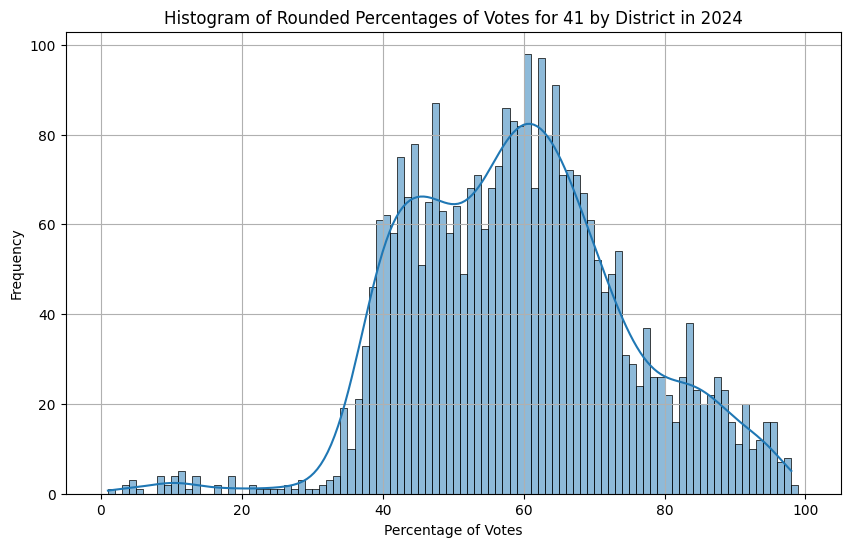

In [5]:
cand_41 = df_2024['CAND || 41 || ქართული ოცნება']
total_votes_series = df_2024['total_votes']
district_id_series = df_2024['district_id']

percentage_2024_25 = (cand_41 / total_votes_series) * 100
rounded_percentage_series_2024 = percentage_2024_25.round()


plt.figure(figsize=(10, 6))
sns.histplot(rounded_percentage_series_2024, bins=range(0, 101), kde=True, edgecolor='black')
plt.xlabel('Percentage of Votes')
plt.ylabel('Frequency')
plt.title('Histogram of Rounded Percentages of Votes for 41 by District in 2024')
plt.grid(True)
plt.show()

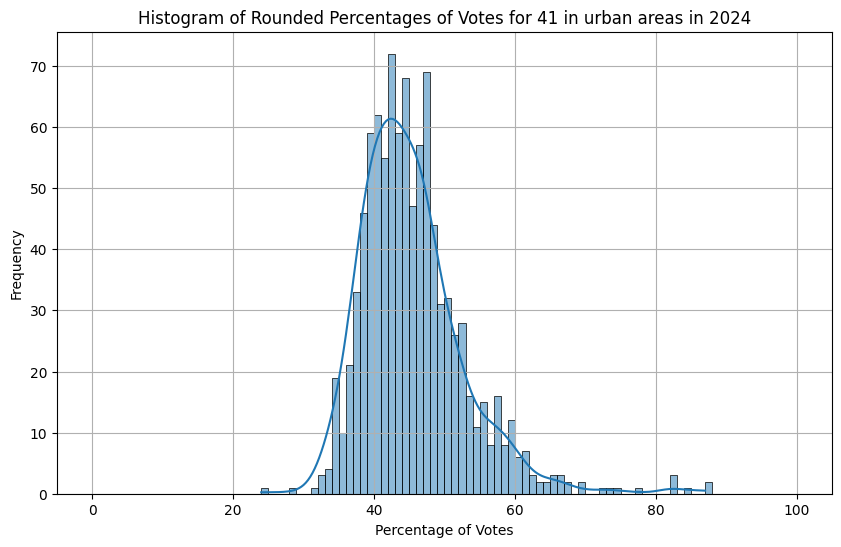

In [6]:
cand_41 = df_2024['CAND || 41 || ქართული ოცნება']
total_votes_series = urban['total_votes']
district_id_series = urban['district_id']

percentage_2024_25 = (cand_41 / total_votes_series) * 100
rounded_percentage_series_2024 = percentage_2024_25.round()


plt.figure(figsize=(10, 6))
sns.histplot(rounded_percentage_series_2024, bins=range(0, 101), kde=True, edgecolor='black')
plt.xlabel('Percentage of Votes')
plt.ylabel('Frequency')
plt.title('Histogram of Rounded Percentages of Votes for 41 in urban areas in 2024')
plt.grid(True)
plt.show()

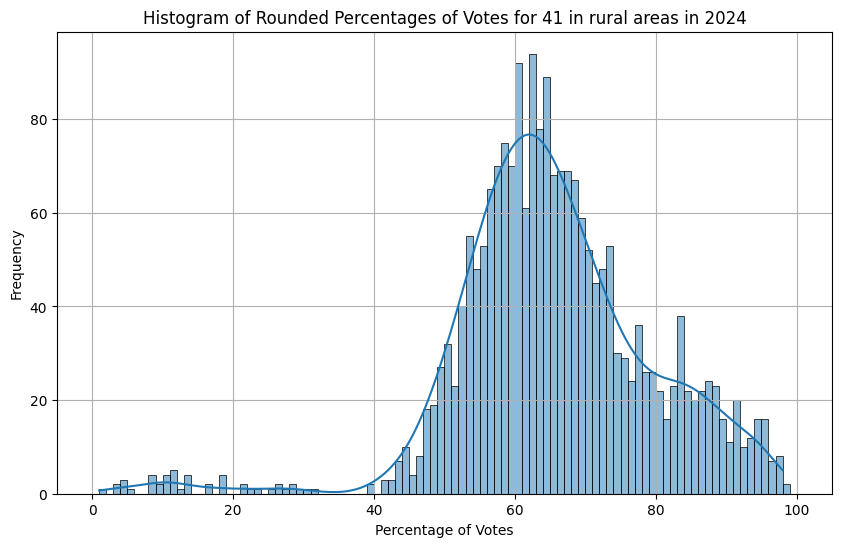

In [7]:
cand_41 = df_2024['CAND || 41 || ქართული ოცნება']
total_votes_series = rural['total_votes']
district_id_series = rural['district_id']

percentage_2024_25 = (cand_41 / total_votes_series) * 100
rounded_percentage_series_2024 = percentage_2024_25.round()


plt.figure(figsize=(10, 6))
sns.histplot(rounded_percentage_series_2024, bins=range(0, 101), kde=True, edgecolor='black')
plt.xlabel('Percentage of Votes')
plt.ylabel('Frequency')
plt.title('Histogram of Rounded Percentages of Votes for 41 in rural areas in 2024')
plt.grid(True)
plt.show()

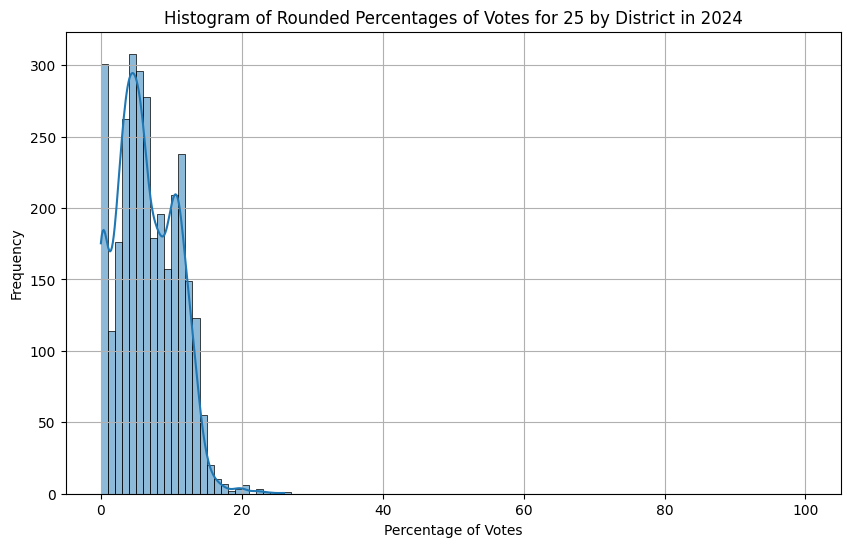

In [8]:
cand_25 = df_2024['CAND || 25 || „გახარია საქართველოსთვის“']
total_votes_series = df_2024['total_votes']
district_id_series = df_2024['district_id']

percentage_2024_25 = (cand_25 / total_votes_series) * 100
rounded_percentage_series_2024 = percentage_2024_25.round()


plt.figure(figsize=(10, 6))
sns.histplot(rounded_percentage_series_2024, bins=range(0, 101), kde=True, edgecolor='black')
plt.xlabel('Percentage of Votes')
plt.ylabel('Frequency')
plt.title('Histogram of Rounded Percentages of Votes for 25 by District in 2024')
plt.grid(True)
plt.show()


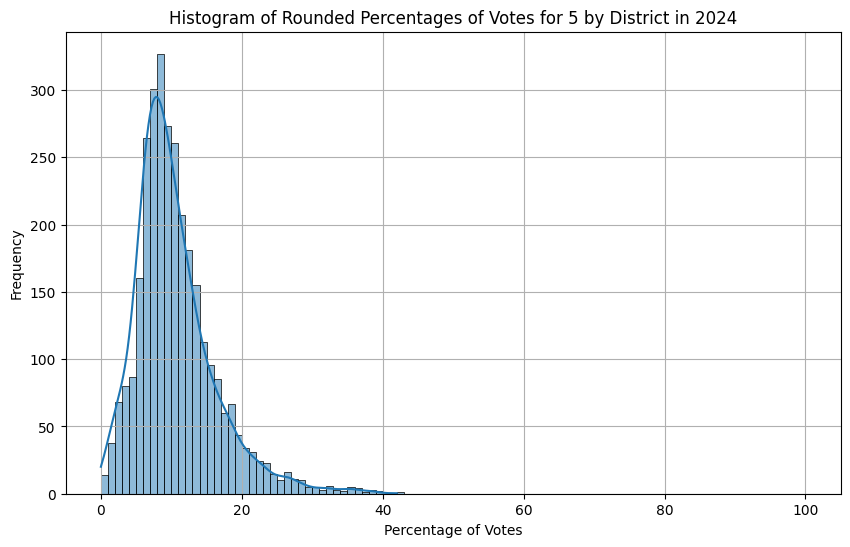

In [9]:
cand_5_series = df_2024['CAND || 5 || „ერთიანობა-ნაციონალური მოძრაობა“']
total_votes_series = df_2024['total_votes']
district_id_series = df_2024['district_id']

percentage_series_2024 = (cand_5_series / total_votes_series) * 100
rounded_percentage_series_2024 = percentage_series_2024.round()


plt.figure(figsize=(10, 6))
sns.histplot(rounded_percentage_series_2024, bins=range(0, 101), kde=True, edgecolor='black')
plt.xlabel('Percentage of Votes')
plt.ylabel('Frequency')
plt.title('Histogram of Rounded Percentages of Votes for 5 by District in 2024')
plt.grid(True)
plt.show()

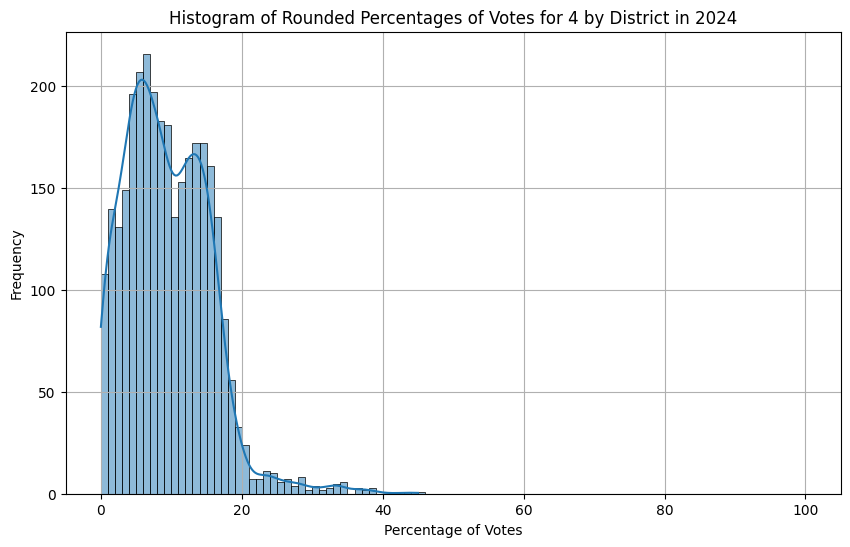

In [4]:
cand_4 = df_2024['CAND || 4 || კოალიცია ცვლილებისთვის გვარამია მელია გირჩი დროა']
total_votes_series = df_2024['total_votes']
district_id_series = df_2024['district_id']

cand_4_df = pd.DataFrame()

cand_4_df['4'] = df_2024['CAND || 4 || კოალიცია ცვლილებისთვის გვარამია მელია გირჩი დროა']
cand_4_df['total_votes'] = df_2024['total_votes'] 
cand_4_df['district_id'] = df_2024['district_id'] 

percentage_series_2024 = (cand_4 / total_votes_series) * 100
rounded_percentage_series_2024 = percentage_series_2024.round()

cand_4_df['percentage'] = rounded_percentage_series_2024

plt.figure(figsize=(10, 6))
sns.histplot(rounded_percentage_series_2024, bins=range(0, 101), kde=True, edgecolor='black')
plt.xlabel('Percentage of Votes')
plt.ylabel('Frequency')
plt.title('Histogram of Rounded Percentages of Votes for 4 by District in 2024')
plt.grid(True)
plt.show()

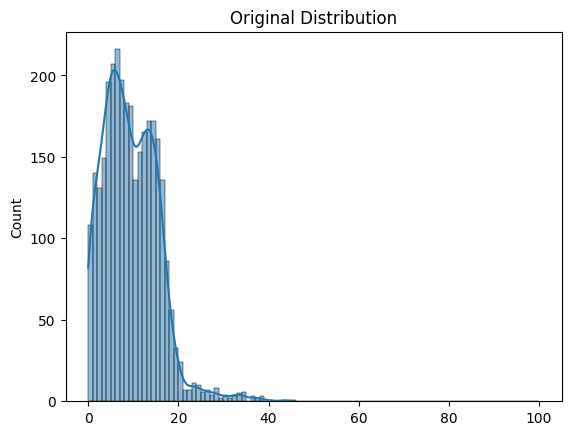

ValueError: Data must be positive.

In [6]:
# Assuming data is in cell 7
# data = np.array([cand_4_df['percentage']])

data = cand_4_df['percentage'].to_numpy()

# Step 1: Visualize the original distribution
# plt.hist(data, bins=range(0,101), alpha=0.5, density=True)
sns.histplot(data, bins=range(0, 101), kde=True, edgecolor='black')
plt.title('Original Distribution')
plt.show()

# Step 2: Apply a transformation (e.g., Box-Cox)
transformed_data, _ = stats.boxcox(data)

# Step 3: Visualize the transformed distribution
# plt.hist(transformed_data, bins=range(0,101), alpha=0.5, color='b', density=True)
sns.histplot(transformed_data, bins=range(0, 101), kde=True, edgecolor='black')

plt.title('Transformed Distribution')
plt.show()

# Step 4: Fit a normal distribution
mu, std = stats.norm.fit(transformed_data)

# Step 5: Plot the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.hist(transformed_data, bins=30, alpha=0.5, color='b', density=True)
plt.title('Fitted Normal Distribution')
plt.show()

# Step 6: Perform a normality test
stat, p_value = stats.shapiro(transformed_data)
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p_value))

# Criteria for normality
if p_value > 0.05:
    print('The transformed data follows a normal distribution')
else:
    print('The transformed data does not follow a normal distribution')

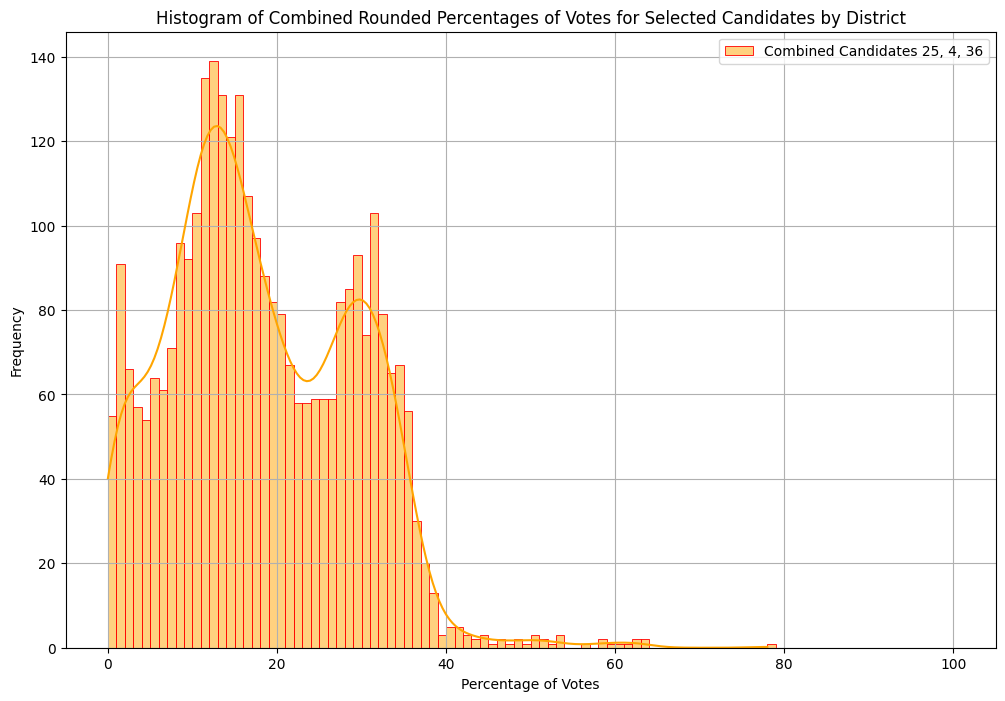

In [11]:
# Define the columns of interest
columns_of_interest = [
    'CAND || 25 || „გახარია საქართველოსთვის“',
    'CAND || 4 || კოალიცია ცვლილებისთვის გვარამია მელია გირჩი დროა',
    'CAND || 36 || „გირჩი“'

    # 'CAND || 5 || „ერთიანობა-ნაციონალური მოძრაობა“'
    # 'CAND || 9 || „ძლიერი საქართველო-ლელო, ხალხისთვის, თავისუფლებისთვის!“'
]

# Calculate the percentages for each candidate
percentages = {}
for column in columns_of_interest:
    percentages[column] = (df_2024[column] / df_2024['total_votes']) * 100

# Create a DataFrame for the percentages
percentages_df = pd.DataFrame(percentages)

# Sum the percentages for the selected candidates
combined_percentage_series = percentages_df.sum(axis=1)

# Plot the combined histogram
plt.figure(figsize=(12, 8))
sns.histplot(combined_percentage_series.round(), bins=range(0, 101), kde=True, edgecolor='red', color='orange', label='Combined Candidates 25, 4, 36')

plt.xlabel('Percentage of Votes')
plt.ylabel('Frequency')
plt.title('Histogram of Combined Rounded Percentages of Votes for Selected Candidates by District')
plt.legend()
plt.grid(True)
plt.show()

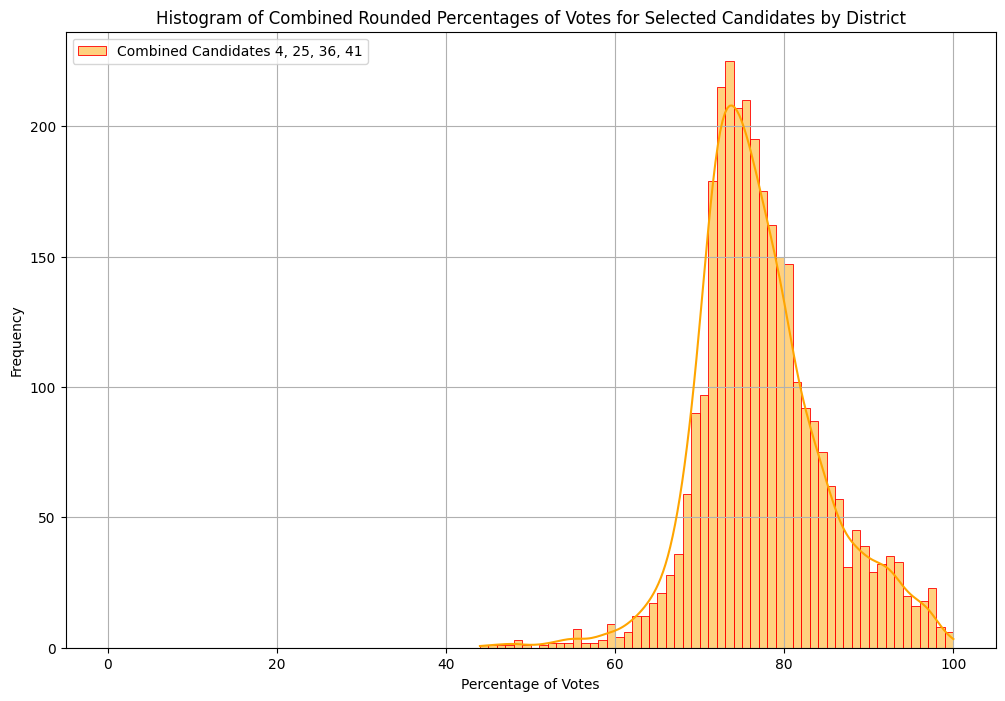

In [12]:
# Define the columns of interest
columns_of_interest = [
    'CAND || 25 || „გახარია საქართველოსთვის“',
    'CAND || 4 || კოალიცია ცვლილებისთვის გვარამია მელია გირჩი დროა',
    'CAND || 36 || „გირჩი“',
    'CAND || 41 || ქართული ოცნება'

    # 'CAND || 5 || „ერთიანობა-ნაციონალური მოძრაობა“'
    # 'CAND || 9 || „ძლიერი საქართველო-ლელო, ხალხისთვის, თავისუფლებისთვის!“'
]

# Calculate the percentages for each candidate
percentages = {}
for column in columns_of_interest:
    percentages[column] = (df_2024[column] / df_2024['total_votes']) * 100

# Create a DataFrame for the percentages
percentages_df = pd.DataFrame(percentages)

# Sum the percentages for the selected candidates
combined_percentage_series = percentages_df.sum(axis=1)

# Plot the combined histogram
plt.figure(figsize=(12, 8))
sns.histplot(combined_percentage_series.round(), bins=range(0, 101), kde=True, edgecolor='red', color='orange', label='Combined Candidates 4, 25, 36, 41')

plt.xlabel('Percentage of Votes')
plt.ylabel('Frequency')
plt.title('Histogram of Combined Rounded Percentages of Votes for Selected Candidates by District')
plt.legend()
plt.grid(True)
plt.show()

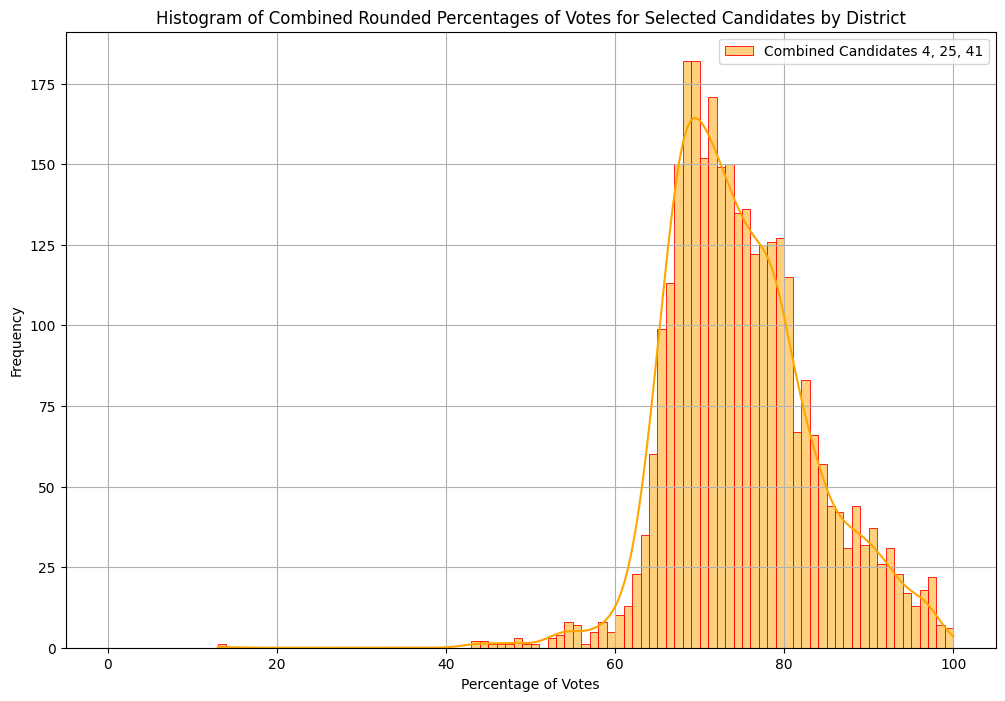

In [13]:
# Define the columns of interest
columns_of_interest = [
    'CAND || 25 || „გახარია საქართველოსთვის“',
    'CAND || 4 || კოალიცია ცვლილებისთვის გვარამია მელია გირჩი დროა',
    # 'CAND || 36 || „გირჩი“',
    'CAND || 41 || ქართული ოცნება'

    # 'CAND || 5 || „ერთიანობა-ნაციონალური მოძრაობა“'
    # 'CAND || 9 || „ძლიერი საქართველო-ლელო, ხალხისთვის, თავისუფლებისთვის!“'
]

# Calculate the percentages for each candidate
percentages = {}
for column in columns_of_interest:
    percentages[column] = (df_2024[column] / df_2024['total_votes']) * 100

# Create a DataFrame for the percentages
percentages_df = pd.DataFrame(percentages)

# Sum the percentages for the selected candidates
combined_percentage_series = percentages_df.sum(axis=1)

# Plot the combined histogram
plt.figure(figsize=(12, 8))
sns.histplot(combined_percentage_series.round(), bins=range(0, 101), kde=True, edgecolor='red', color='orange', label='Combined Candidates 4, 25, 41')

plt.xlabel('Percentage of Votes')
plt.ylabel('Frequency')
plt.title('Histogram of Combined Rounded Percentages of Votes for Selected Candidates by District')
plt.legend()
plt.grid(True)
plt.show()

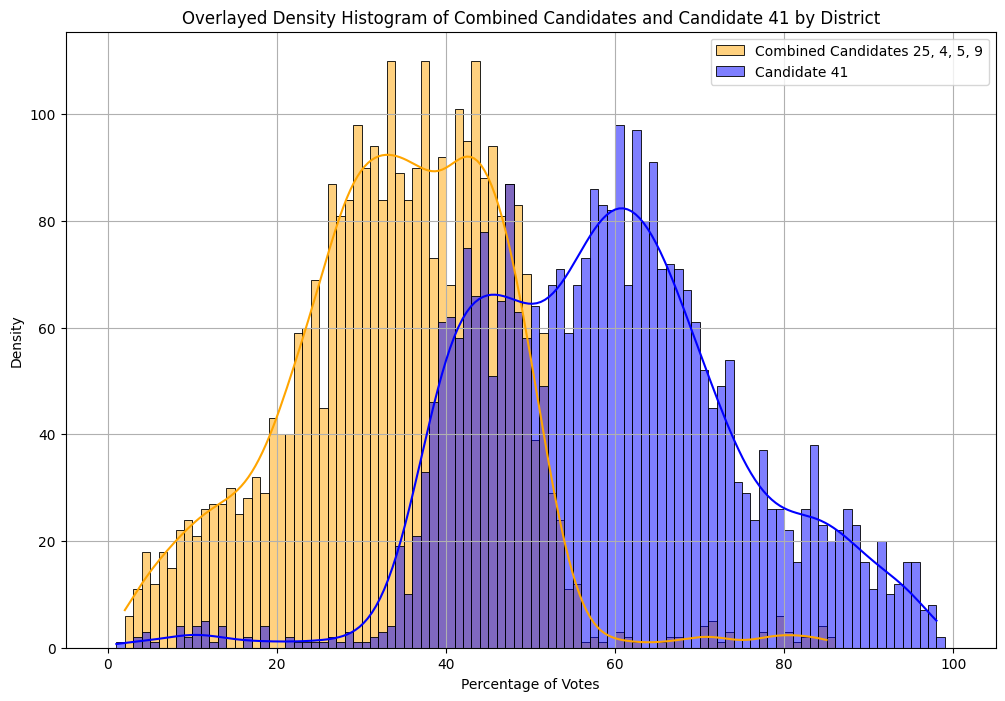

In [14]:
# Define the columns of interest
columns_of_interest = [
    'CAND || 25 || „გახარია საქართველოსთვის“',
    'CAND || 4 || კოალიცია ცვლილებისთვის გვარამია მელია გირჩი დროა',
    'CAND || 5 || „ერთიანობა-ნაციონალური მოძრაობა“',
    'CAND || 9 || „ძლიერი საქართველო-ლელო, ხალხისთვის, თავისუფლებისთვის!“'
]

# Calculate the percentages for each candidate
percentages = {}
for column in columns_of_interest:
    percentages[column] = (df_2024[column] / df_2024['total_votes']) * 100

# Create a DataFrame for the percentages
percentages_df = pd.DataFrame(percentages)

# Sum the percentages for the selected candidates
combined_percentage_series = percentages_df.sum(axis=1)

# Calculate the percentage for candidate 41
party_41_series = (df_2024['CAND || 41 || ქართული ოცნება'] / df_2024['total_votes']) * 100
rounded_party_41_series = party_41_series.round()

# Plot the combined histogram
plt.figure(figsize=(12, 8))
sns.histplot(combined_percentage_series.round(), bins=range(0, 101), kde=True, edgecolor='black', color='orange', label='Combined Candidates 25, 4, 5, 9')
sns.histplot(rounded_party_41_series, bins=range(0, 101), kde=True, edgecolor='black', color='blue', label='Candidate 41')

plt.xlabel('Percentage of Votes')
plt.ylabel('Density')
plt.title('Overlayed Density Histogram of Combined Candidates and Candidate 41 by District')
plt.legend()
plt.grid(True)
# plt.show()

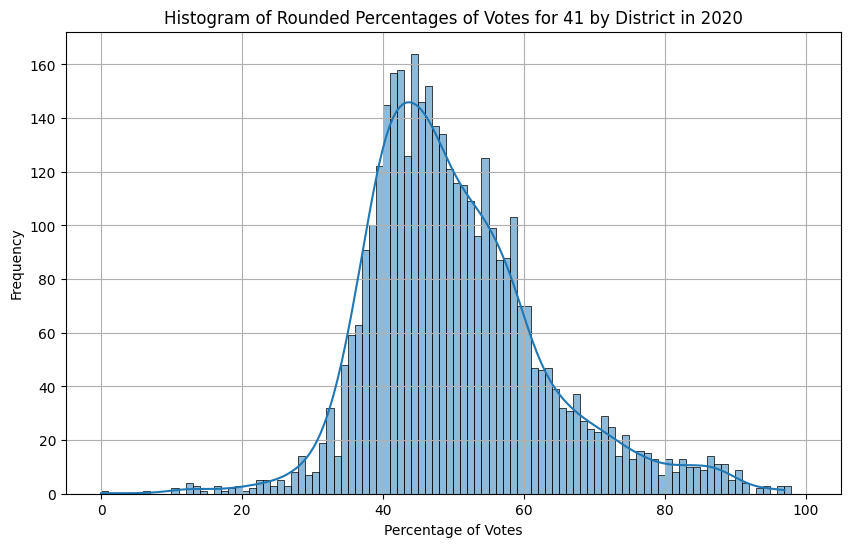

In [15]:
party_41_series_2020 = df_2020['Party || 41 || ქართული ოცნება - დემოკრატიული საქართველო|"Georgian Dream – Democratic Georgia"']
total_votes_series_2020 = df_2020['total_votes']
district_id_series_2020 = df_2020['district_id']

percentage_series_2020 = (party_41_series_2020 / total_votes_series_2020) * 100
rounded_percentage_series_2020 = percentage_series_2020.round()

plt.figure(figsize=(10, 6))
sns.histplot(rounded_percentage_series_2020, bins=range(0, 101), kde=True, edgecolor='black')
plt.xlabel('Percentage of Votes')
plt.ylabel('Frequency')
plt.title('Histogram of Rounded Percentages of Votes for 41 by District in 2020')
plt.grid(True)
plt.show()

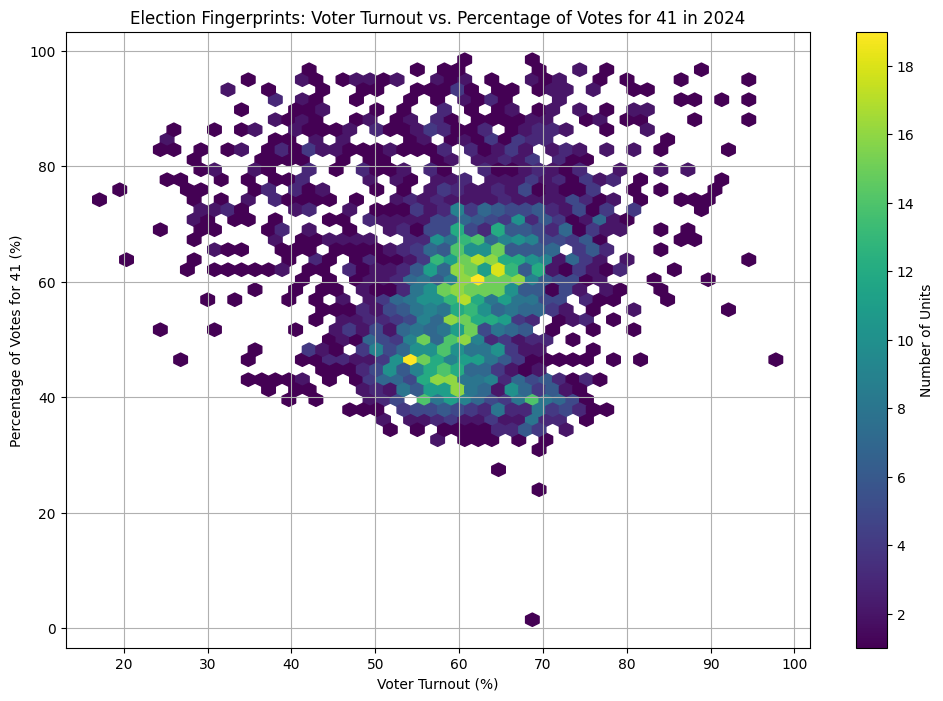

In [16]:

# Calculate the percentage of votes for 'CAND || 41 || ქართული ოცნება'
party_41_series = (df_2024['CAND || 41 || ქართული ოცნება'] / df_2024['total_votes']) * 100

# Calculate voter turnout
turnout_series = (df_2024['total_votes'] / df_2024['total_registered_voters']) * 100

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Turnout': turnout_series,
    'Percentage of Votes': party_41_series
})

# Filter the DataFrame to include only points with Turnout < 100
plot_df = plot_df[plot_df['Turnout'] < 100]

# Plot the two-dimensional histogram
plt.figure(figsize=(12, 8))
hb = plt.hexbin(plot_df['Turnout'], plot_df['Percentage of Votes'], gridsize=50, cmap='viridis', mincnt=1)
cb = plt.colorbar(hb)
cb.set_label('Number of Units')

plt.xlabel('Voter Turnout (%)')
plt.ylabel('Percentage of Votes for 41 (%)')
plt.title('Election Fingerprints: Voter Turnout vs. Percentage of Votes for 41 in 2024')
# plt.xlim(0, 100)
# plt.ylim(0, 100)
plt.grid(True)
plt.show()

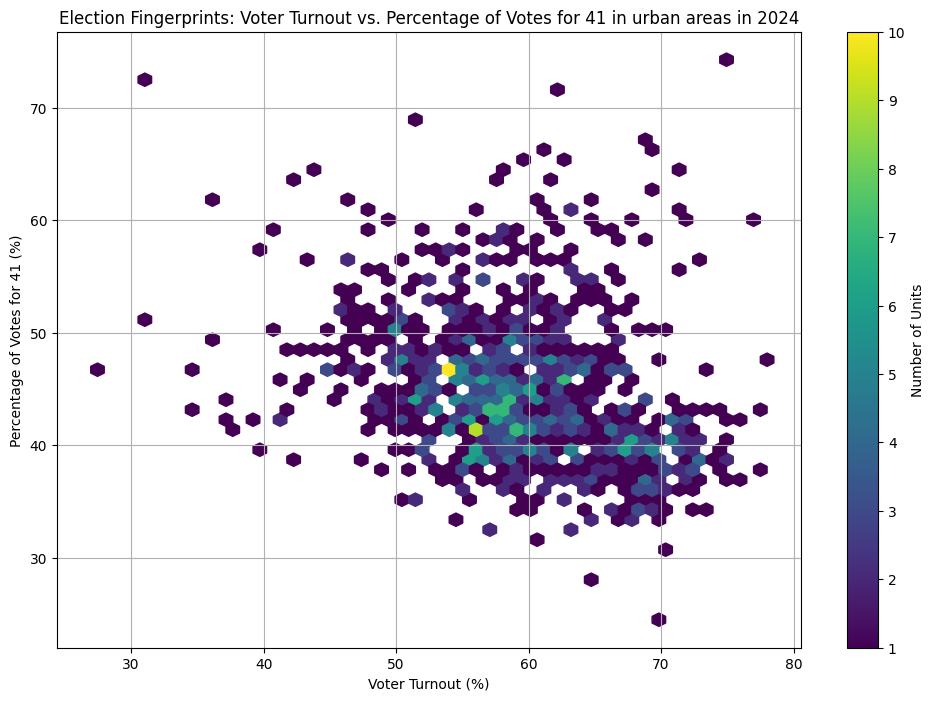

In [17]:

# Calculate the percentage of votes for 'CAND || 41 || ქართული ოცნება'
party_41_series = (urban['CAND || 41 || ქართული ოცნება'] / urban['total_votes']) * 100

# Calculate voter turnout
turnout_series = (urban['total_votes'] / urban['total_registered_voters']) * 100

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Turnout': turnout_series,
    'Percentage of Votes': party_41_series
})

# Plot the two-dimensional histogram
plt.figure(figsize=(12, 8))
hb = plt.hexbin(plot_df['Turnout'], plot_df['Percentage of Votes'], gridsize=50, cmap='viridis', mincnt=1)
cb = plt.colorbar(hb)
cb.set_label('Number of Units')

plt.xlabel('Voter Turnout (%)')
plt.ylabel('Percentage of Votes for 41 (%)')
plt.title('Election Fingerprints: Voter Turnout vs. Percentage of Votes for 41 in urban areas in 2024')
# plt.xlim(0, 100)
# plt.ylim(0, 100)
plt.grid(True)
plt.show()

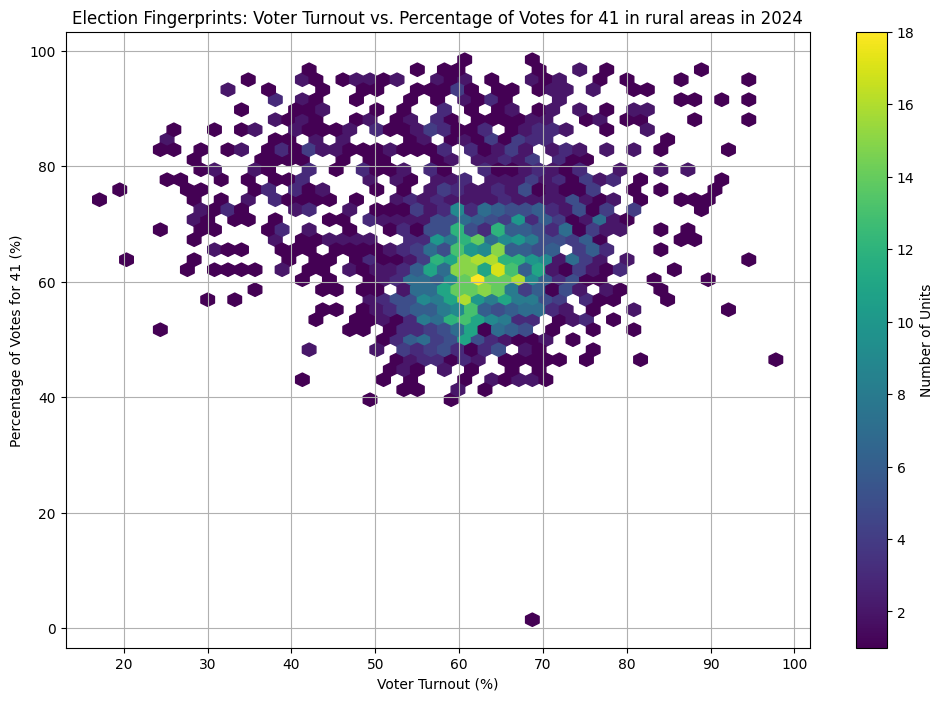

In [18]:
# Calculate the percentage of votes for 'CAND || 41 || ქართული ოცნება'
party_41_series = (rural['CAND || 41 || ქართული ოცნება'] / rural['total_votes']) * 100

# Calculate voter turnout
turnout_series = (rural['total_votes'] / rural['total_registered_voters']) * 100

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Turnout': turnout_series,
    'Percentage of Votes': party_41_series
})

# Filter the DataFrame to include only points with Turnout < 100
plot_df = plot_df[plot_df['Turnout'] < 100]

# Plot the two-dimensional histogram
plt.figure(figsize=(12, 8))
hb = plt.hexbin(plot_df['Turnout'], plot_df['Percentage of Votes'], gridsize=50, cmap='viridis', mincnt=1)
cb = plt.colorbar(hb)
cb.set_label('Number of Units')

plt.xlabel('Voter Turnout (%)')
plt.ylabel('Percentage of Votes for 41 (%)')
plt.title('Election Fingerprints: Voter Turnout vs. Percentage of Votes for 41 in rural areas in 2024')
# plt.xlim(0, 100)
# plt.ylim(0, 100)
plt.grid(True)
plt.show()

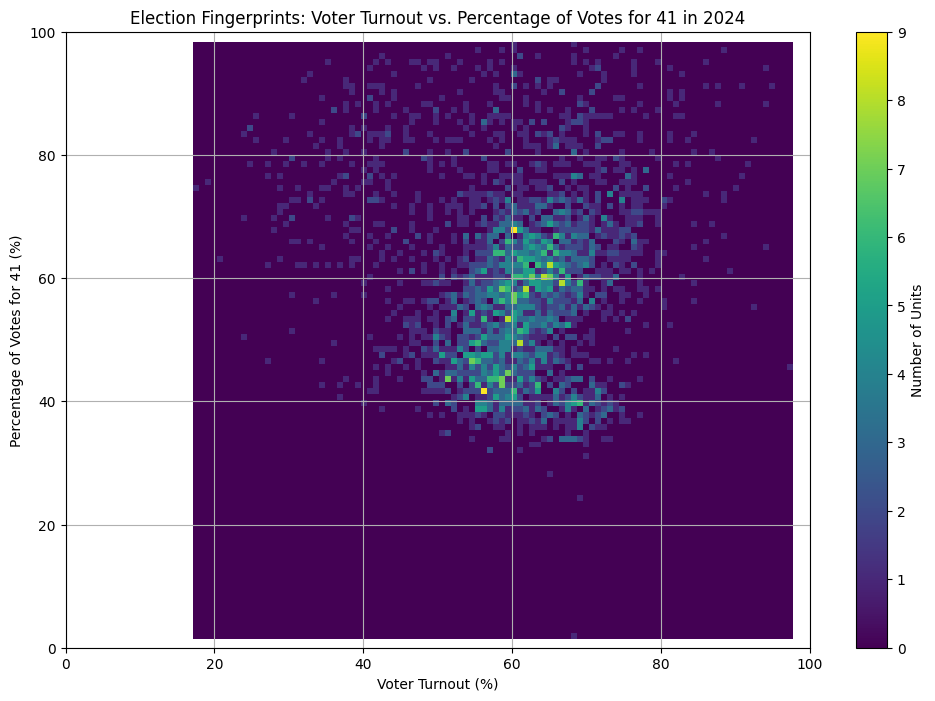

In [46]:
# Calculate the percentage of votes for 'CAND || 41 || ქართული ოცნება'
party_41_series = (df_2024['CAND || 41 || ქართული ოცნება'] / df_2024['total_votes']) * 100

# Calculate voter turnout
turnout_series = (df_2024['total_votes'] / df_2024['total_registered_voters']) * 100

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Turnout': turnout_series,
    'Percentage of Votes': party_41_series
})

# Filter the DataFrame to include only points with Turnout < 100
plot_df = plot_df[plot_df['Turnout'] < 100]

# Plot the two-dimensional histogram using hist2d
plt.figure(figsize=(12, 8))
hist, xedges, yedges, im = plt.hist2d(plot_df['Turnout'], plot_df['Percentage of Votes'], bins=[100, 100], cmap='viridis')

cb = plt.colorbar(im)
cb.set_label('Number of Units')

plt.xlabel('Voter Turnout (%)')
plt.ylabel('Percentage of Votes for 41 (%)')
plt.title('Election Fingerprints: Voter Turnout vs. Percentage of Votes for 41 in 2024')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)
plt.show()

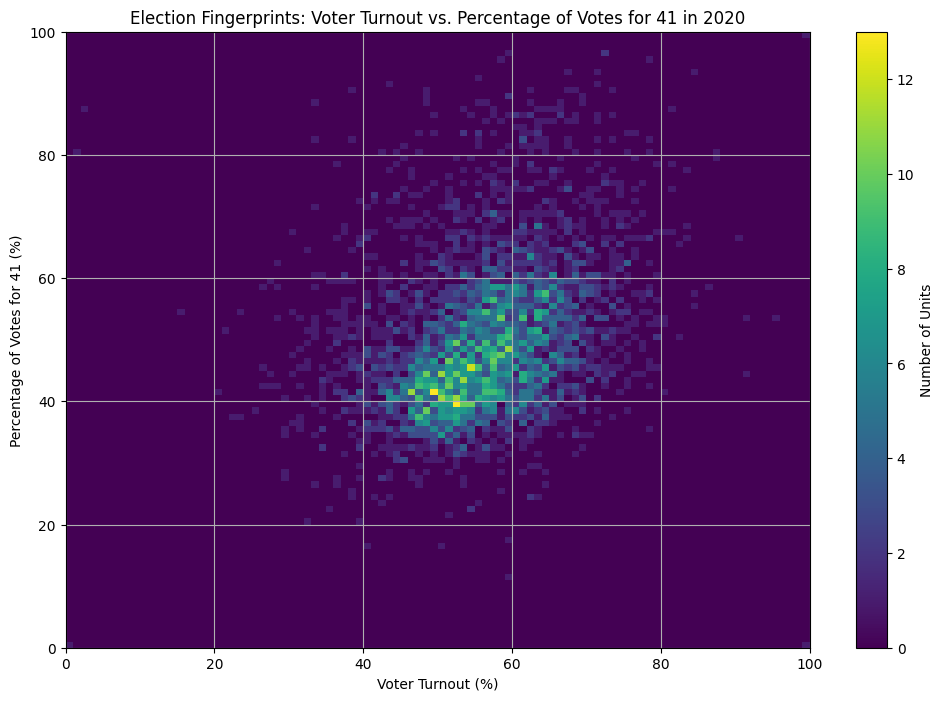

In [62]:
# Calculate the percentage of votes for 'CAND || 41 || ქართული ოცნება'
# party_41_series = (df_2024['CAND || 41 || ქართული ოცნება'] / df_2024['total_votes']) * 100

# Calculate voter turnout
# turnout_series = (df_2024['total_votes'] / df_2024['total_registered_voters']) * 100


# Calculate the percentage of votes for 'CAND || 41 || ქართული ოცნება' as a percentage of total registered voters
party_41_series = (df_2020['Party || 41 || ქართული ოცნება - დემოკრატიული საქართველო|"Georgian Dream – Democratic Georgia"'] / df_2020['total_votes']) * 100

# Calculate voter turnout as a percentage of registered voters
turnout_series = (df_2020['total_votes'] / df_2020['total_registered_voters']) * 100

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Turnout': turnout_series,
    'Percentage of Votes': party_41_series
})

# Filter the DataFrame to include only points with Turnout < 100
plot_df = plot_df[plot_df['Turnout'] < 100]

# Add boundary values to ensure the histogram is fully populated
boundary_rows = pd.DataFrame({
    'Turnout': [0, 100, 100],
    'Percentage of Votes': [0, 0, 100]
})
plot_df = pd.concat([plot_df, boundary_rows], ignore_index=True)

# Plot the two-dimensional histogram using hist2d
plt.figure(figsize=(12, 8))
hist, xedges, yedges, im = plt.hist2d(plot_df['Turnout'], plot_df['Percentage of Votes'], bins=[100, 100], cmap='viridis')

cb = plt.colorbar(im)
cb.set_label('Number of Units')

plt.xlabel('Voter Turnout (%)')
plt.ylabel('Percentage of Votes for 41 (%)')
plt.title('Election Fingerprints: Voter Turnout vs. Percentage of Votes for 41 in 2020')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)
plt.show()

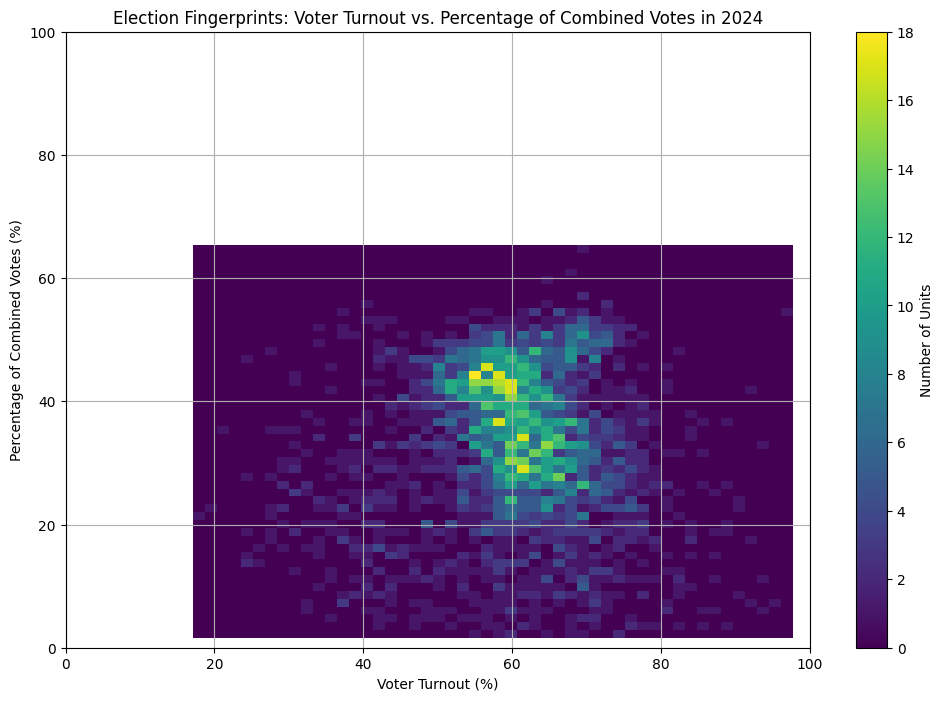

In [20]:
# Define the columns of interest
columns_of_interest = [
    'CAND || 25 || „გახარია საქართველოსთვის“',
    'CAND || 4 || კოალიცია ცვლილებისთვის გვარამია მელია გირჩი დროა',
    'CAND || 5 || „ერთიანობა-ნაციონალური მოძრაობა“',
    'CAND || 9 || „ძლიერი საქართველო-ლელო, ხალხისთვის, თავისუფლებისთვის!“'
]

# Calculate the combined votes for the columns of interest
combined_votes_series = df_2024[columns_of_interest].sum(axis=1)

# Calculate the percentage of combined votes
combined_percentage_series = (combined_votes_series / df_2024['total_votes']) * 100

# Calculate voter turnout
turnout_series = (df_2024['total_votes'] / df_2024['total_registered_voters']) * 100

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Turnout': turnout_series,
    'Percentage of Combined Votes': combined_percentage_series
})

# Filter the DataFrame to include only points with Turnout < 100
plot_df = plot_df[plot_df['Turnout'] < 100]

# Plot the two-dimensional histogram using hist2d
plt.figure(figsize=(12, 8))
hist, xedges, yedges, im = plt.hist2d(plot_df['Turnout'], plot_df['Percentage of Combined Votes'], bins=[50, 50], cmap='viridis')

cb = plt.colorbar(im)
cb.set_label('Number of Units')

plt.xlabel('Voter Turnout (%)')
plt.ylabel('Percentage of Combined Votes (%)')
plt.title('Election Fingerprints: Voter Turnout vs. Percentage of Combined Votes in 2024')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)
plt.show()

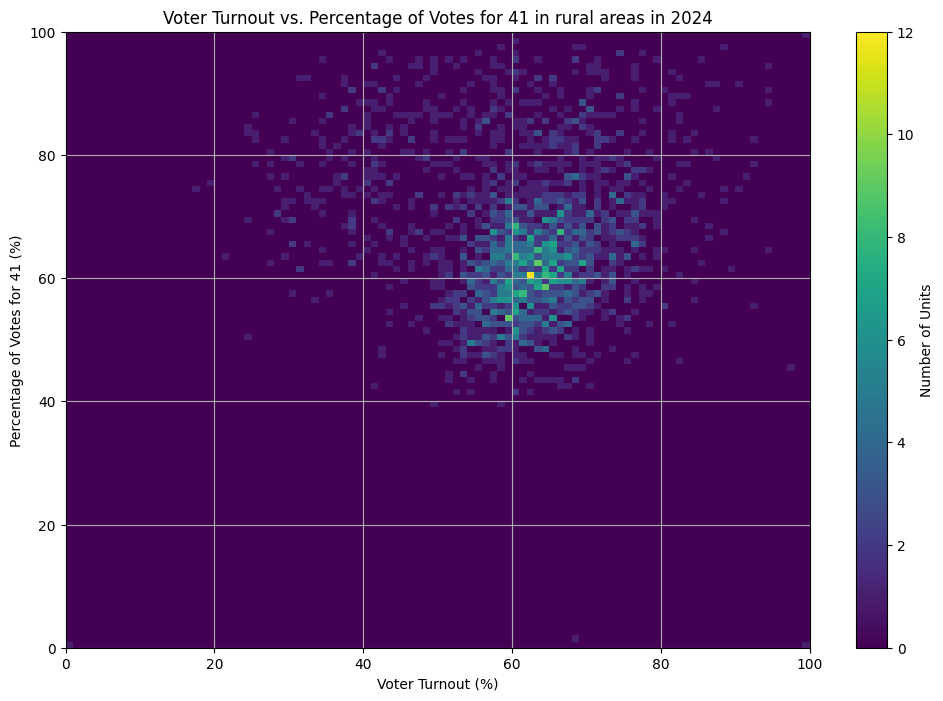

In [61]:
# Calculate the percentage of votes for 'CAND || 41 || ქართული ოცნება'
party_41_series = (rural['CAND || 41 || ქართული ოცნება'] / rural['total_votes']) * 100

# Calculate voter turnout
turnout_series = (rural['total_votes'] / rural['total_registered_voters']) * 100

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Turnout': turnout_series,
    'Percentage of Votes': party_41_series
})

# Filter the DataFrame to include only points with Turnout < 100
plot_df = plot_df[plot_df['Turnout'] < 100]

# Add boundary values to ensure the histogram is fully populated
boundary_rows = pd.DataFrame({
    'Turnout': [0, 100, 100],
    'Percentage of Votes': [0, 0, 100]
})
plot_df = pd.concat([plot_df, boundary_rows], ignore_index=True)

# Plot the two-dimensional histogram using hist2d
plt.figure(figsize=(12, 8))
hist, xedges, yedges, im = plt.hist2d(plot_df['Turnout'], plot_df['Percentage of Votes'], bins=[100, 100], cmap='viridis')

cb = plt.colorbar(im)
cb.set_label('Number of Units')

plt.xlabel('Voter Turnout (%)')
plt.ylabel('Percentage of Votes for 41 (%)')
plt.title('Voter Turnout vs. Percentage of Votes for 41 in rural areas in 2024')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)
plt.show()

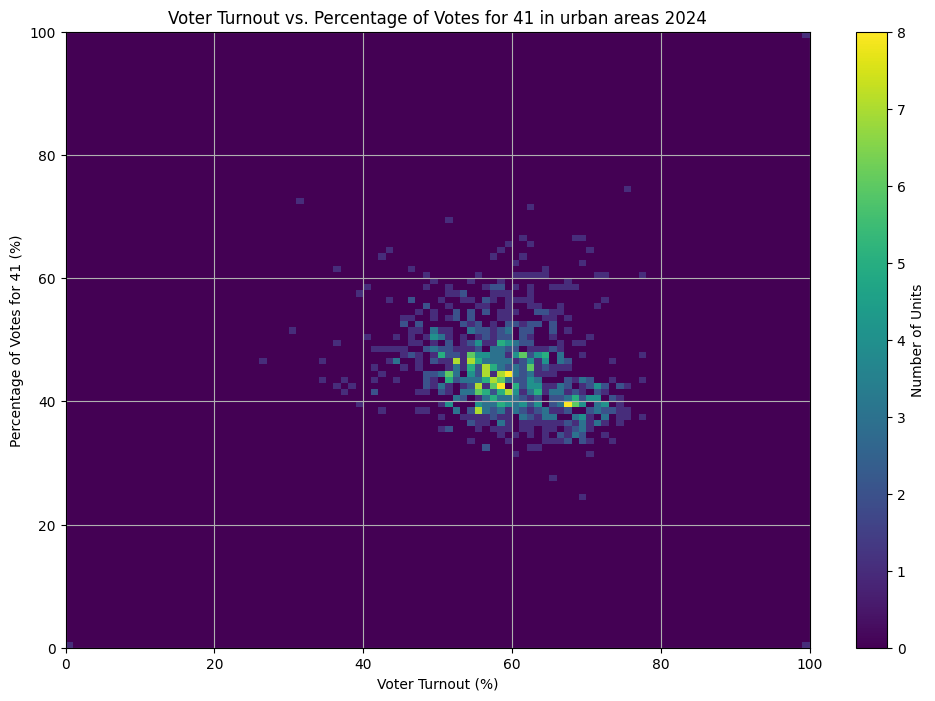

In [58]:

# Calculate the percentage of votes for 'CAND || 41 || ქართული ოცნება'
party_41_series = (urban['CAND || 41 || ქართული ოცნება'] / urban['total_votes']) * 100

# Calculate voter turnout
turnout_series = (urban['total_votes'] / urban['total_registered_voters']) * 100

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Turnout': turnout_series,
    'Percentage of Votes': party_41_series
})

# Filter the DataFrame to include only points with Turnout < 100
plot_df = plot_df[plot_df['Turnout'] < 100]

# Add boundary values to ensure the histogram is fully populated
boundary_rows = pd.DataFrame({
    'Turnout': [0, 100, 100],
    'Percentage of Votes': [0, 0, 100]
})
plot_df = pd.concat([plot_df, boundary_rows], ignore_index=True)


# Plot the two-dimensional histogram using hist2d
plt.figure(figsize=(12, 8))
hist, xedges, yedges, im = plt.hist2d(plot_df['Turnout'], plot_df['Percentage of Votes'], bins=[100, 100], cmap='viridis')

cb = plt.colorbar(im)
cb.set_label('Number of Units')

plt.xlabel('Voter Turnout (%)')
plt.ylabel('Percentage of Votes for 41 (%)')
plt.title('Voter Turnout vs. Percentage of Votes for 41 in urban areas 2024')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)
plt.show()

In [63]:
# df_2024.columns.to_list()

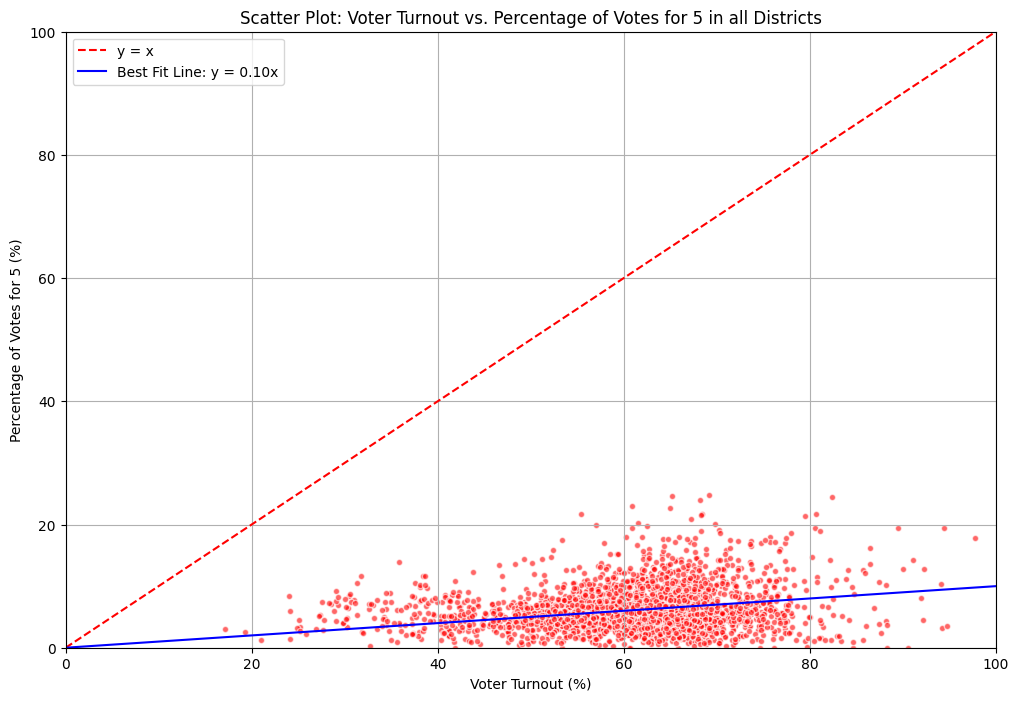

In [ ]:
# Calculate the percentage of votes for 'CAND || 41 || ქართული ოცნება' as a percentage of total registered voters
# party_41_percentage_of_registered_voters = (df_2024['CAND || 4 || კოალიცია ცვლილებისთვის გვარამია მელია გირჩი დროა'] / df_2024['total_registered_voters']) * 100
party_41_percentage_of_registered_voters = (df_2024['CAND || 5 || „ერთიანობა-ნაციონალური მოძრაობა“'] / df_2024['total_registered_voters']) * 100

#  'CAND || 5 || „ერთიანობა-ნაციონალური მოძრაობა“',

# party_41_percentage_of_registered_voters = (df_2024['CAND || 41 || ქართული ოცნება'] / df_2024['total_registered_voters']) * 100


# Calculate voter turnout as a percentage of registered voters
turnout_percentage = (df_2024['total_votes'] / df_2024['total_registered_voters']) * 100

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Turnout': turnout_percentage,
    'Result': party_41_percentage_of_registered_voters
})


# Remove rows with NaN or infinite values
plot_df = plot_df.replace([np.inf, -np.inf], np.nan).dropna()
# Add boundary values to ensure the histogram is fully populated
boundary_rows = pd.DataFrame({
    'Turnout': [0, 100, 100],
    'Percentage of Votes': [0, 0, 100]
})
plot_df = pd.concat([plot_df, boundary_rows], ignore_index=True)
# Perform linear regression without intercept
slope = np.sum(plot_df['Turnout'] * plot_df['Result']) / np.sum(plot_df['Turnout'] ** 2)
line_fit = slope * plot_df['Turnout']

# Define the x values for the line of best fit
x_values = np.array([0, 100])
y_values = slope * x_values


# Plot the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(plot_df['Turnout'], plot_df['Result'], alpha=0.6, edgecolors='w', s=20, color='red')
plt.plot([0, 100], [0, 100], color='red', linestyle='--', label='y = x')  # Reference line at y = x
plt.plot(x_values, y_values, color='blue', label=f'Best Fit Line: y = {slope:.2f}x')
plt.xlabel('Voter Turnout (%)')
plt.ylabel('Percentage of Votes for 5 (%)')
plt.title('Scatter Plot: Voter Turnout vs. Percentage of Votes for 5 in all Districts')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)
plt.legend()
plt.show()

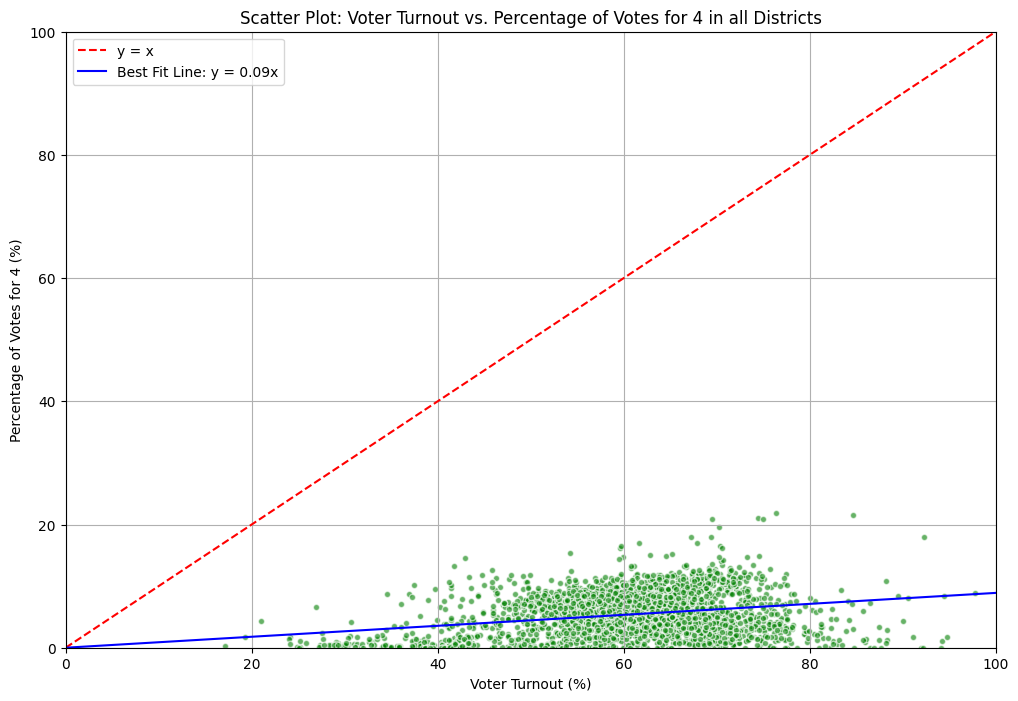

In [42]:

# Calculate the percentage of votes for 'CAND || 41 || ქართული ოცნება' as a percentage of total registered voters
party_41_percentage_of_registered_voters = (df_2024['CAND || 4 || კოალიცია ცვლილებისთვის გვარამია მელია გირჩი დროა'] / df_2024['total_registered_voters']) * 100
# party_41_percentage_of_registered_voters = (df_2024['CAND || 41 || ქართული ოცნება'] / df_2024['total_registered_voters']) * 100


# Calculate voter turnout as a percentage of registered voters
turnout_percentage = (df_2024['total_votes'] / df_2024['total_registered_voters']) * 100

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Turnout': turnout_percentage,
    'Result': party_41_percentage_of_registered_voters
})


# Remove rows with NaN or infinite values
plot_df = plot_df.replace([np.inf, -np.inf], np.nan).dropna()

# Perform linear regression without intercept
slope = np.sum(plot_df['Turnout'] * plot_df['Result']) / np.sum(plot_df['Turnout'] ** 2)
line_fit = slope * plot_df['Turnout']

# Define the x values for the line of best fit
x_values = np.array([0, 100])
y_values = slope * x_values


# Plot the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(plot_df['Turnout'], plot_df['Result'], alpha=0.6, edgecolors='w', s=20, color='green')
plt.plot([0, 100], [0, 100], color='red', linestyle='--', label='y = x')  # Reference line at y = x
plt.plot(x_values, y_values, color='blue', label=f'Best Fit Line: y = {slope:.2f}x')
plt.xlabel('Voter Turnout (%)')
plt.ylabel('Percentage of Votes for 4 (%)')
plt.title('Scatter Plot: Voter Turnout vs. Percentage of Votes for 4 in all Districts')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)
plt.legend()
plt.show()

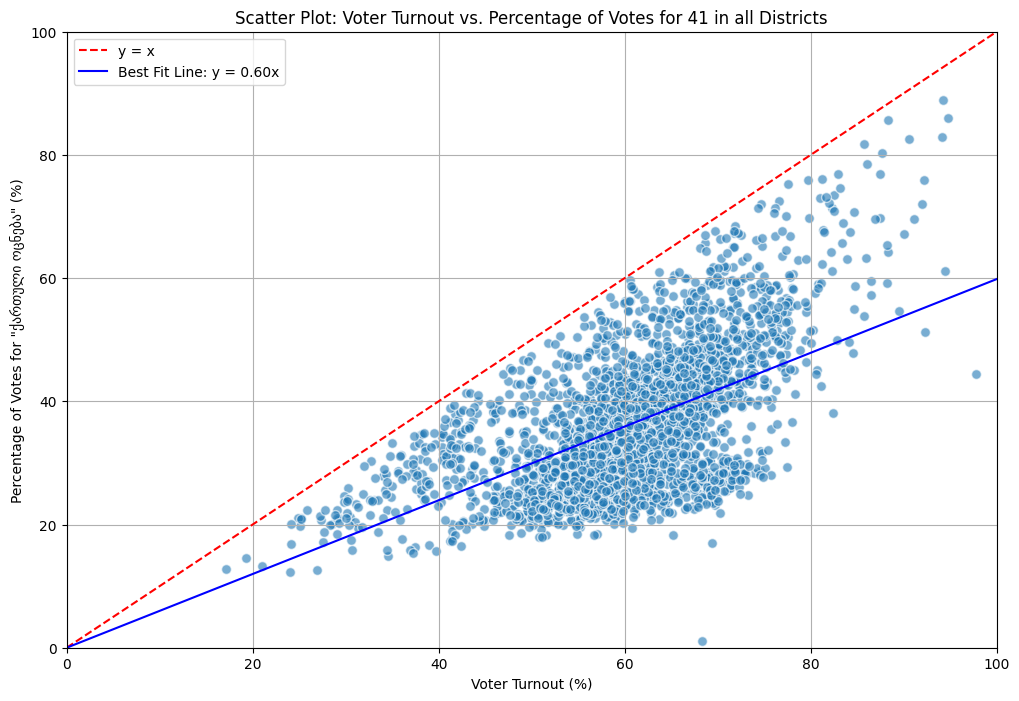

In [31]:

# Calculate the percentage of votes for 'CAND || 41 || ქართული ოცნება' as a percentage of total registered voters
party_41_percentage_of_registered_voters = (df_2024['CAND || 41 || ქართული ოცნება'] / df_2024['total_registered_voters']) * 100

# Calculate voter turnout as a percentage of registered voters
turnout_percentage = (df_2024['total_votes'] / df_2024['total_registered_voters']) * 100

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Turnout': turnout_percentage,
    'Result': party_41_percentage_of_registered_voters
})


# Remove rows with NaN or infinite values
plot_df = plot_df.replace([np.inf, -np.inf], np.nan).dropna()

# Perform linear regression without intercept
slope = np.sum(plot_df['Turnout'] * plot_df['Result']) / np.sum(plot_df['Turnout'] ** 2)
line_fit = slope * plot_df['Turnout']

# Define the x values for the line of best fit
x_values = np.array([0, 100])
y_values = slope * x_values


# Plot the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(plot_df['Turnout'], plot_df['Result'], alpha=0.6, edgecolors='w', s=50)
plt.plot([0, 100], [0, 100], color='red', linestyle='--', label='y = x')  # Reference line at y = x
plt.plot(x_values, y_values, color='blue', label=f'Best Fit Line: y = {slope:.2f}x')
plt.xlabel('Voter Turnout (%)')
plt.ylabel('Percentage of Votes for "ქართული ოცნება" (%)')
plt.title('Scatter Plot: Voter Turnout vs. Percentage of Votes for 41 in all Districts')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)
plt.legend()
plt.show()

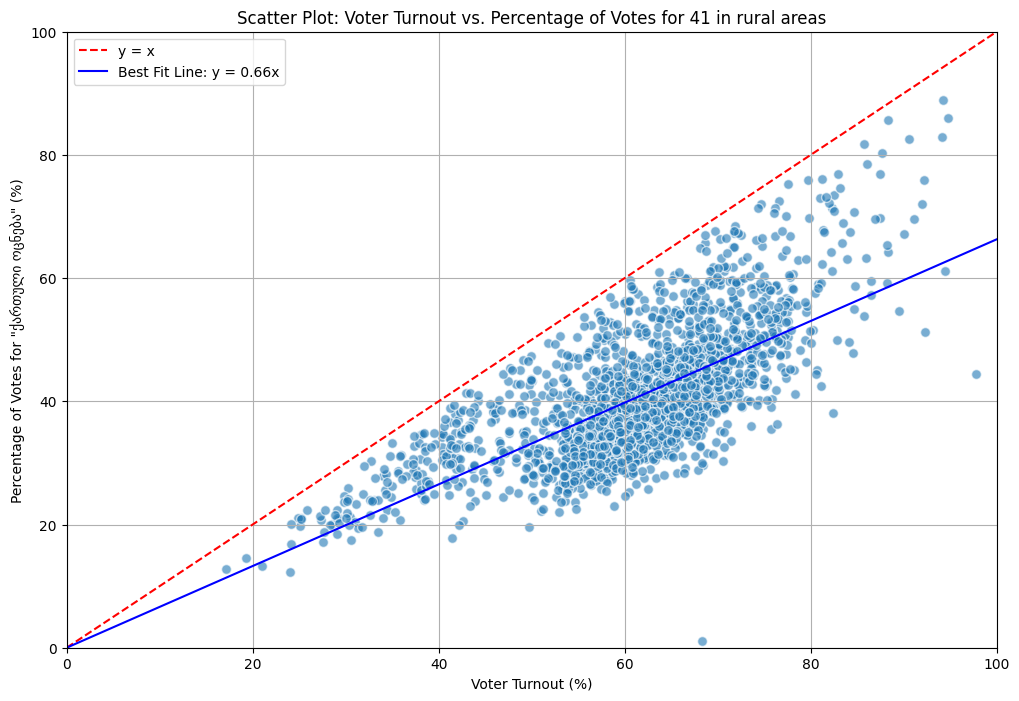

In [29]:
# Calculate the percentage of votes for 'CAND || 41 || ქართული ოცნება' as a percentage of total registered voters
party_41_percentage_of_registered_voters = (rural['CAND || 41 || ქართული ოცნება'] / rural['total_registered_voters']) * 100

# Calculate voter turnout as a percentage of registered voters
turnout_percentage = (rural['total_votes'] / rural['total_registered_voters']) * 100

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Turnout': turnout_percentage,
    'Result': party_41_percentage_of_registered_voters
})

# Remove rows with NaN or infinite values
plot_df = plot_df.replace([np.inf, -np.inf], np.nan).dropna()

# Perform linear regression without intercept
slope = np.sum(plot_df['Turnout'] * plot_df['Result']) / np.sum(plot_df['Turnout'] ** 2)
line_fit = slope * plot_df['Turnout']

# Define the x values for the line of best fit
x_values = np.array([0, 100])
y_values = slope * x_values

# Plot the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(plot_df['Turnout'], plot_df['Result'], alpha=0.6, edgecolors='w', s=50)
plt.plot([0, 100], [0, 100], color='red', linestyle='--', label='y = x')  # Reference line at y = x
plt.plot(x_values, y_values, color='blue', label=f'Best Fit Line: y = {slope:.2f}x')
plt.xlabel('Voter Turnout (%)')
plt.ylabel('Percentage of Votes for "ქართული ოცნება" (%)')
plt.title('Scatter Plot: Voter Turnout vs. Percentage of Votes for 41 in rural areas')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)
plt.legend()
plt.show()

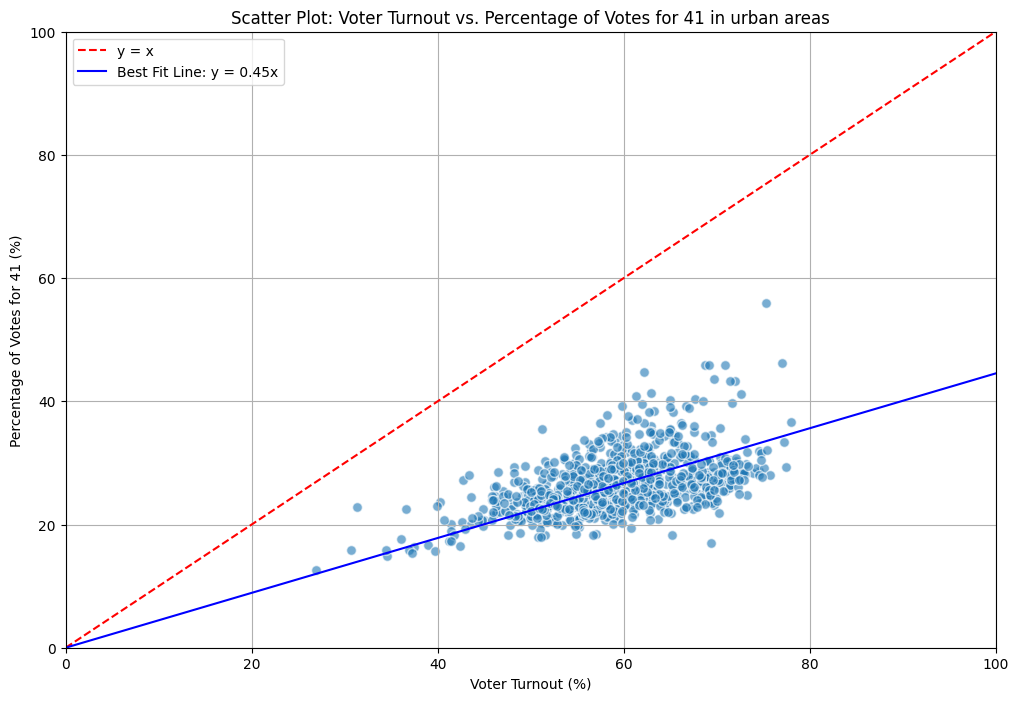

In [33]:

# Calculate the percentage of votes for 'CAND || 41 || ქართული ოცნება' as a percentage of total registered voters
party_41_percentage_of_registered_voters = (urban['CAND || 41 || ქართული ოცნება'] / urban['total_registered_voters']) * 100

# Calculate voter turnout as a percentage of registered voters
turnout_percentage = (urban['total_votes'] / urban['total_registered_voters']) * 100

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Turnout': turnout_percentage,
    'Result': party_41_percentage_of_registered_voters
})

# Remove rows with NaN or infinite values
plot_df = plot_df.replace([np.inf, -np.inf], np.nan).dropna()

# Perform linear regression without intercept
slope = np.sum(plot_df['Turnout'] * plot_df['Result']) / np.sum(plot_df['Turnout'] ** 2)
line_fit = slope * plot_df['Turnout']

# Define the x values for the line of best fit
x_values = np.array([0, 100])
y_values = slope * x_values

# Plot the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(plot_df['Turnout'], plot_df['Result'], alpha=0.6, edgecolors='w', s=50)
plt.plot([0, 100], [0, 100], color='red', linestyle='--', label='y = x')  # Reference line at y = x
plt.plot(x_values, y_values, color='blue', label=f'Best Fit Line: y = {slope:.2f}x')
plt.xlabel('Voter Turnout (%)')
plt.ylabel('Percentage of Votes for 41 (%)')
plt.title('Scatter Plot: Voter Turnout vs. Percentage of Votes for 41 in urban areas')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)
plt.legend()
plt.show()

In [37]:
# df_2020.dtypes
# df_2020.columns.tolist()


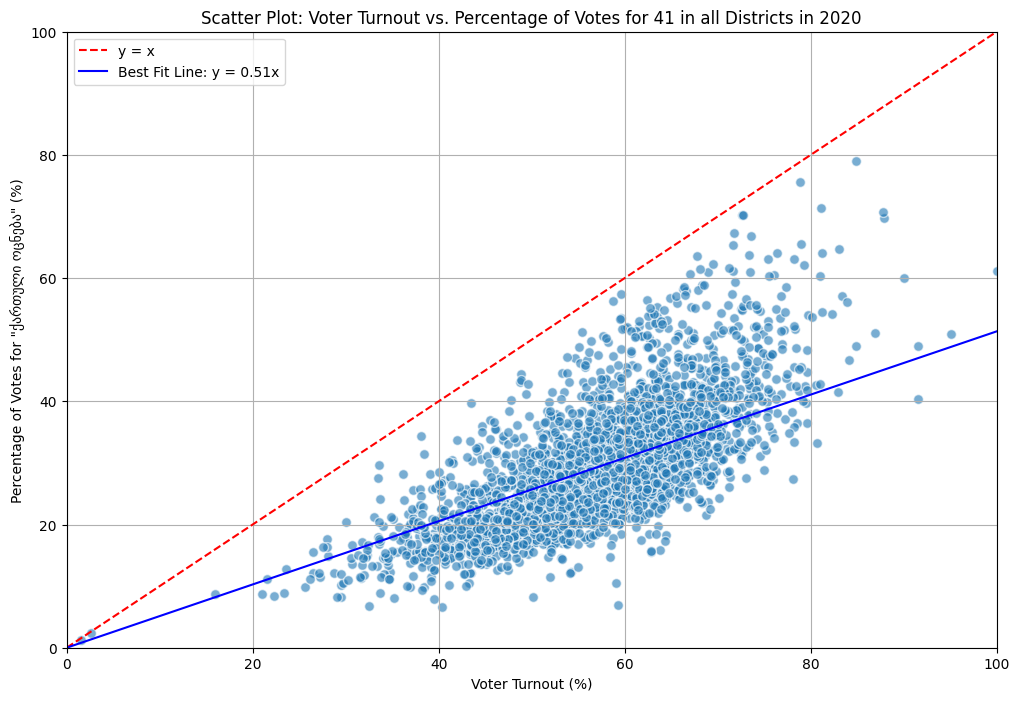

In [36]:
# Calculate the percentage of votes for 'CAND || 41 || ქართული ოცნება' as a percentage of total registered voters
party_41_percentage_of_registered_voters = (df_2020['Party || 41 || ქართული ოცნება - დემოკრატიული საქართველო|"Georgian Dream – Democratic Georgia"'] / df_2020['total_registered_voters']) * 100

# Calculate voter turnout as a percentage of registered voters
turnout_percentage = (df_2020['total_votes'] / df_2020['total_registered_voters']) * 100

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Turnout': turnout_percentage,
    'Result': party_41_percentage_of_registered_voters
})


# Remove rows with NaN or infinite values
plot_df = plot_df.replace([np.inf, -np.inf], np.nan).dropna()

# Perform linear regression without intercept
slope = np.sum(plot_df['Turnout'] * plot_df['Result']) / np.sum(plot_df['Turnout'] ** 2)
line_fit = slope * plot_df['Turnout']

# Define the x values for the line of best fit
x_values = np.array([0, 100])
y_values = slope * x_values


# Plot the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(plot_df['Turnout'], plot_df['Result'], alpha=0.6, edgecolors='w', s=50)
plt.plot([0, 100], [0, 100], color='red', linestyle='--', label='y = x')  # Reference line at y = x
plt.plot(x_values, y_values, color='blue', label=f'Best Fit Line: y = {slope:.2f}x')
plt.xlabel('Voter Turnout (%)')
plt.ylabel('Percentage of Votes for "ქართული ოცნება" (%)')
plt.title('Scatter Plot: Voter Turnout vs. Percentage of Votes for 41 in all Districts in 2020')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)
plt.legend()
plt.show()

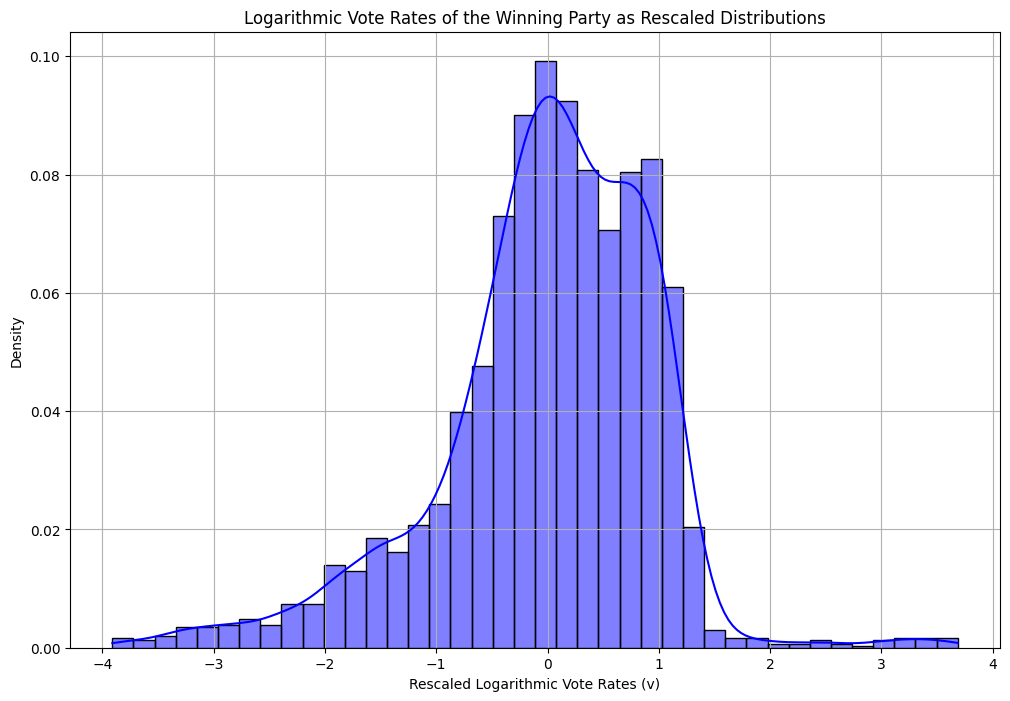

In [75]:

# Calculate the number of votes for the winning party 'CAND || 41 || ქართული ოცნება'

# winning_votes = df_2024['Party || 41 || ქართული ოცნება - დემოკრატიული საქართველო|"Georgian Dream – Democratic Georgia"'] 

winning_votes = df_2024['CAND || 41 || ქართული ოცნება']

# Calculate the total number of votes
total_votes = df_2024['total_votes']

# Calculate the logarithmic vote rates v
v = np.log((total_votes - winning_votes) / winning_votes)

# Rescale the distributions to have zero mean and unit variance
v_rescaled = (v - np.mean(v)) / np.std(v)

v_rescaled = v_rescaled[(v_rescaled >= -4) & (v_rescaled <= 4)]


# Plot the rescaled distributions
plt.figure(figsize=(12, 8))
sns.histplot(v_rescaled, kde=True, bins=40, color='blue', edgecolor='black', stat='probability')
plt.xlabel('Rescaled Logarithmic Vote Rates (v)')
plt.ylabel('Density')
plt.title('Logarithmic Vote Rates of the Winning Party as Rescaled Distributions')
plt.grid(True)
plt.show()

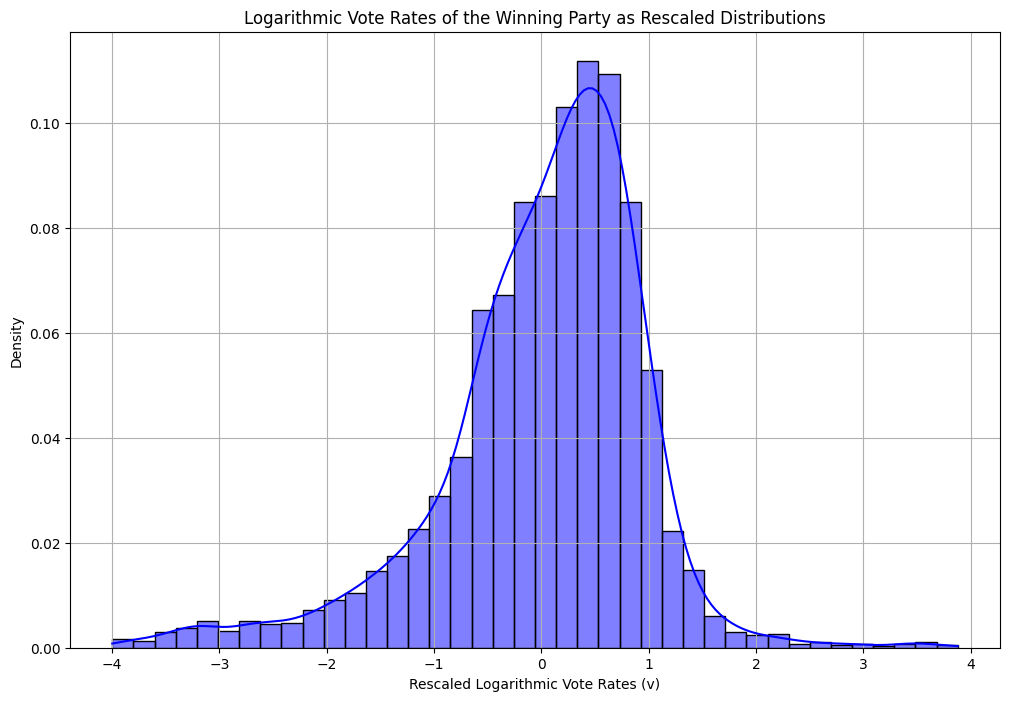

In [79]:
# Calculate the number of votes for the winning party 'CAND || 41 || ქართული ოცნება'

winning_votes = df_2020['Party || 41 || ქართული ოცნება - დემოკრატიული საქართველო|"Georgian Dream – Democratic Georgia"'] 

# winning_votes = df_2024['CAND || 41 || ქართული ოცნება']

# Calculate the total number of votes
total_votes = df_2020['total_votes']


# Remove NaN, infinite, and negative values from the series
winning_votes = winning_votes.replace([np.inf, -np.inf], np.nan).dropna()
total_votes = total_votes.replace([np.inf, -np.inf], np.nan).dropna()

# Ensure both series have the same length after removing NaN values
valid_indices = winning_votes.index.intersection(total_votes.index)
winning_votes = winning_votes.loc[valid_indices]
total_votes = total_votes.loc[valid_indices]

# Remove negative values
valid_indices = (total_votes > 0) & (winning_votes > 0)
winning_votes = winning_votes[valid_indices]
total_votes = total_votes[valid_indices]



# Calculate the logarithmic vote rates v
v = np.log((total_votes - winning_votes) / winning_votes)

# Rescale the distributions to have zero mean and unit variance
v_rescaled = (v - np.mean(v)) / np.std(v)

v_rescaled = v_rescaled[(v_rescaled >= -4) & (v_rescaled <= 4)]


# Plot the rescaled distributions
plt.figure(figsize=(12, 8))
sns.histplot(v_rescaled, kde=True, bins=40, color='blue', edgecolor='black', stat='probability')
plt.xlabel('Rescaled Logarithmic Vote Rates (v)')
plt.ylabel('Density')
plt.title('Logarithmic Vote Rates of the Winning Party as Rescaled Distributions')
plt.grid(True)
plt.show()

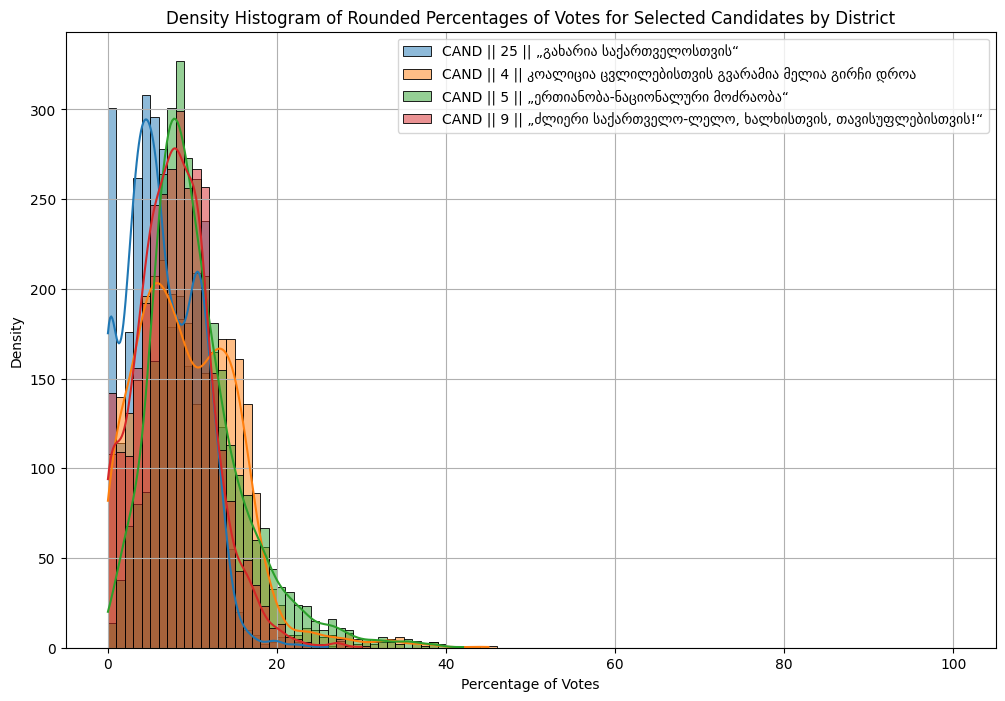

In [27]:
# Define the columns of interest
columns_of_interest = [
    'CAND || 25 || „გახარია საქართველოსთვის“',
    'CAND || 4 || კოალიცია ცვლილებისთვის გვარამია მელია გირჩი დროა',
    'CAND || 5 || „ერთიანობა-ნაციონალური მოძრაობა“',
    'CAND || 9 || „ძლიერი საქართველო-ლელო, ხალხისთვის, თავისუფლებისთვის!“'
]

# Calculate the percentages for each candidate
percentages = {}
for column in columns_of_interest:
    percentages[column] = (df_2024[column] / df_2024['total_votes']) * 100

# Create a DataFrame for the percentages
percentages_df = pd.DataFrame(percentages)

# Plot the combined histogram
plt.figure(figsize=(12, 8))
for column in percentages_df.columns:
    sns.histplot(percentages_df[column].round(), bins=range(0, 101), kde=True, label=column)

plt.xlabel('Percentage of Votes')
plt.ylabel('Density')
plt.title('Density Histogram of Rounded Percentages of Votes for Selected Candidates by District')
plt.legend()
plt.grid(True)
plt.show()